# 1. Determine optimal number of clusters

## Load data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# create small dataset as an example

data = {"A": [5, 3, 5, -1], "B": [20, 21, 19, 18], "C": [1, 2, 3, 4]}
df = pd.DataFrame(data)
df

A   B  C
0  5  20  1
1  3  21  2
2  5  19  3
3 -1  18  4

## Sum of squares

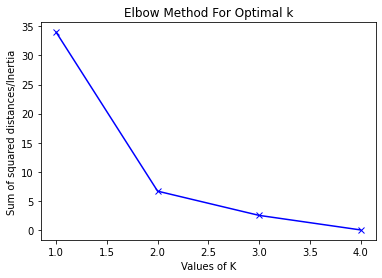

In [3]:
# verify sum of squared distances vs amount of clusters that are used to create them.

# inertia = sum of distances of all the points from centroid within cluster, in other words it tells us 'how condensed clusters are' The lower the value the more condensed cluster is

Sum_of_squared_distances = []
K = range(1, 5)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, Sum_of_squared_distances, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances/Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()

## Silhouette score

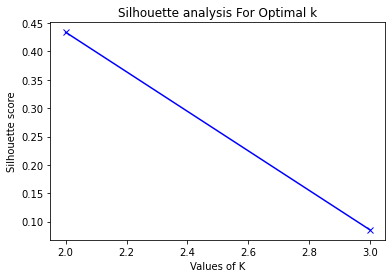

In [5]:
# Silhouette score ranging from -1 to 1, tells us how 'distanced' clusters are from each other. If value is -1 it means that clusters are overlapping if 1 it means that clusters are separated

# update range_n_clusters to how many clusters you want to test
range_n_clusters = range(2, 4)
silhouette_avg = []
for num_clusters in range_n_clusters:

    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(df, cluster_labels))
plt.plot(range_n_clusters, silhouette_avg, "bx-")
plt.xlabel("Values of K")
plt.ylabel("Silhouette score")
plt.title("Silhouette analysis For Optimal k")
plt.show()

# 2. Cluster modelling - KMeans

In [6]:
# update n_clusters to amount of clusters based on sum of squares and silhouette score
kmeans = KMeans(n_clusters=2, random_state=0).fit(df)

clusters = kmeans.fit_predict(df)

df["grouping"] = clusters

In [7]:
# distribution of allocated clusters
print(df["grouping"].value_counts(normalize=True))
print(df["grouping"].value_counts())

0    0.75
1    0.25
Name: grouping, dtype: float64
0    3
1    1
Name: grouping, dtype: int64
